In [1]:
# Zilin Chen
# 6/15/2022
# This project is aim to analyze the past performance of five stocks:
#     Apple Inc. (AAPL), The Boeing Company (BA), Citigroup Inc. (C), 
#     Starbucks Corporation (SBUX), International Business Machines Corporation (IBM)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use('seaborn-white')
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('Stocks.xlsx')
df.index = df['date']
df.drop(['date'], axis=1, inplace=True)
# order data from least recent to most recent
df = df[::-1] 

In [4]:
df.head()

,AAPL,BA,C,SBUX,IBM
date,,,,,
2018-01-02,41.246176,282.831151,66.388565,53.517513,129.078956
2018-01-03,41.238993,283.745845,66.593909,54.520444,132.627059
2018-01-04,41.430546,282.669173,67.415285,54.724745,135.313240
2018-01-05,41.902245,294.264831,67.326005,55.356220,135.974325
2018-01-08,41.746608,295.513008,66.540341,55.077628,136.794405


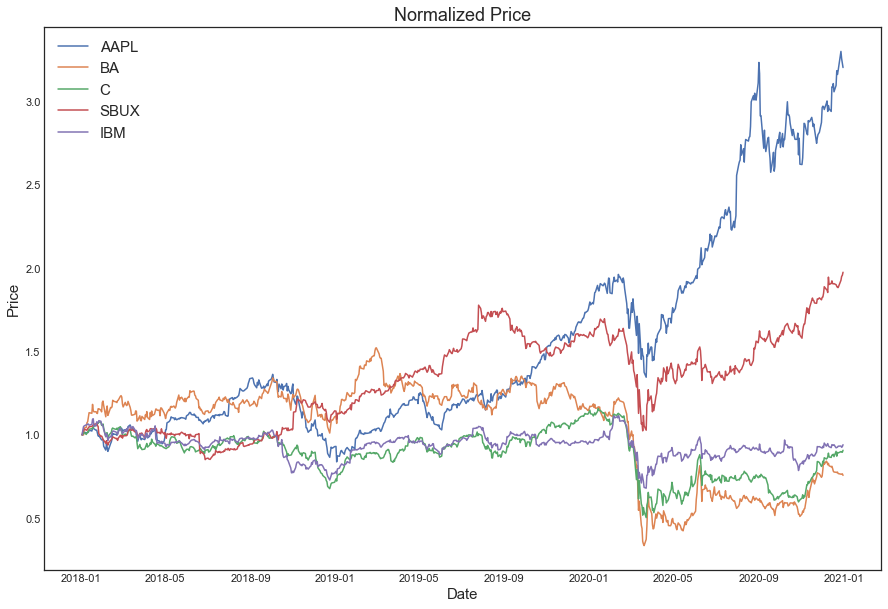

In [5]:
# to visualize the data, we use normalized price to generate a graph of 
# historical performance of each stock
normal_price = df/df.iloc[0]
fig = plt.figure(figsize=(15,10))
plt.plot(normal_price)
title = plt.title('Normalized Price', fontsize = 18)
xlabel = plt.xlabel('Date', fontsize = 15)
ylabel = plt.ylabel('Price', fontsize = 15)
plt.legend(('AAPL','BA','C','SBUX','IBM'), fontsize=15, loc='best')
plt.show()

### Return Analysis

We analyze the return of each stock by calculating its daily price change in percentage

In [6]:
# we use the pct_change function to calculate daily percentage change
returns = df.pct_change()
returns

,AAPL,BA,C,SBUX,IBM
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.003234,0.003093,0.018740,0.027488
2018-01-04,0.004645,-0.003794,0.012334,0.003747,0.020254
2018-01-05,0.011385,0.041022,-0.001324,0.011539,0.004886
2018-01-08,-0.003714,0.004242,-0.011670,-0.005033,0.006031
...,...,...,...,...,...
2020-12-24,0.007712,-0.011562,-0.003455,-0.000490,0.006376
2020-12-28,0.035766,-0.004881,0.009246,0.022841,0.001043
2020-12-29,-0.013315,0.000740,-0.003599,0.012363,-0.008172


In [7]:
# use arithmetic mean to calculate expected daily return of each stock
expect_returns = returns.mean()
expect_returns

AAPL    0.001787
BA      0.000259
C       0.000252
SBUX    0.001099
IBM     0.000099
dtype: float64

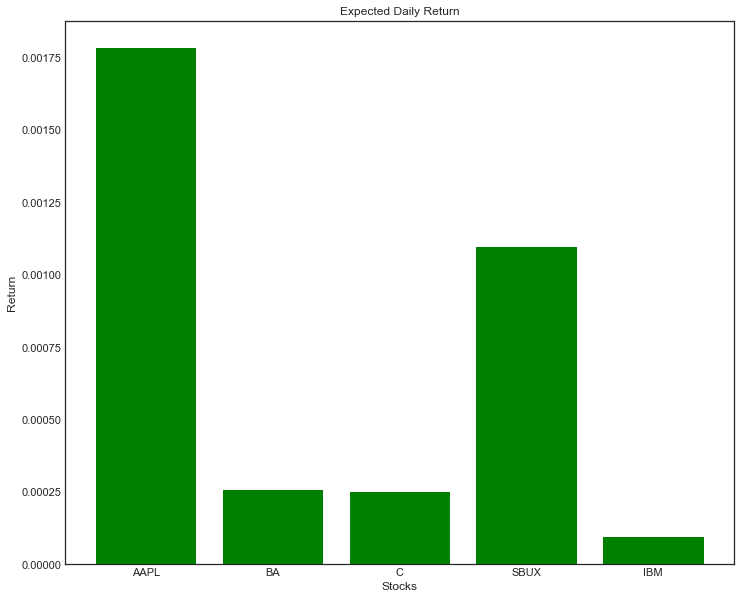

In [8]:
# Visualize using bar chart
fig = plt.figure(figsize=(12,10))
plt.bar(['AAPL', 'BA', 'C', 'SBUX', 'IBM'], expect_returns.values, color='green')
title = plt.title('Expected Daily Return', fontsize=12)
xlabel = plt.xlabel('Stocks', fontsize=12)
ylabel = plt.ylabel('Return', fontsize=12)
plt.show()

### Volatility

We use standard deviation to measure volatility.
<br>
A formula to calculate std is showed below:
$$ std = \sqrt{\sum_{i=1}^{N}(x_i - \bar{x})^2 / (N-1)}$$
So annualized volatility can be caculated as:
<br>
$$ \text{Annualized std} = std \times \sqrt{252} $$

In [9]:
sqrt_one_year = np.sqrt(252)
stocks_std = returns.std().apply(lambda x:x*sqrt_one_year)
stocks_std

AAPL    0.351019
BA      0.562205
C       0.436846
SBUX    0.315832
IBM     0.300045
dtype: float64

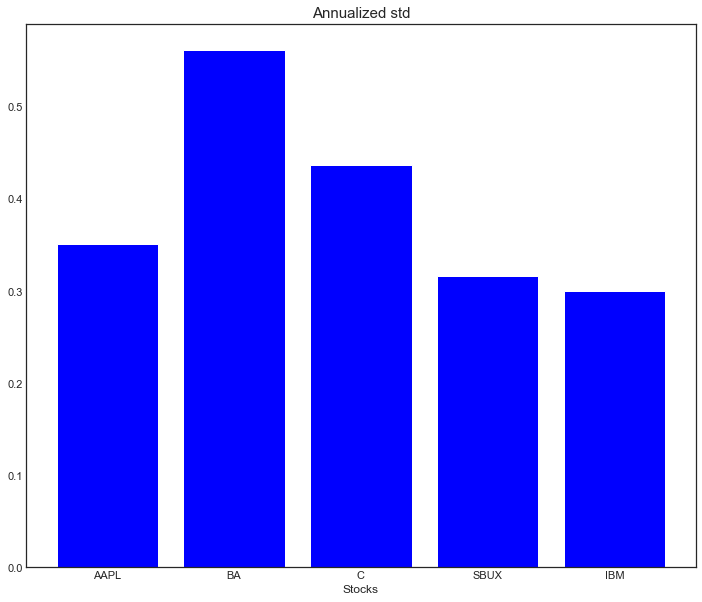

In [10]:
# Visualize using bar chart
fig = plt.figure(figsize=(12,10))
plt.bar(['AAPL', 'BA', 'C', 'SBUX', 'IBM'], stocks_std.values, color='blue')
title = plt.title('Annualized std', fontsize=15)
xlabel = plt.xlabel('Stocks', fontsize=12)
plt.show()

Other risk measurement of return including skewness and kurtosis. <br>
$$Skewness = E\left[\left(\frac{X -\mu}{\sigma(X)}\right)^3\right]$$ <br>
$$Kurtosis = E\left[\left(\frac{X -\mu}{\sigma(X)}\right)^4\right]$$

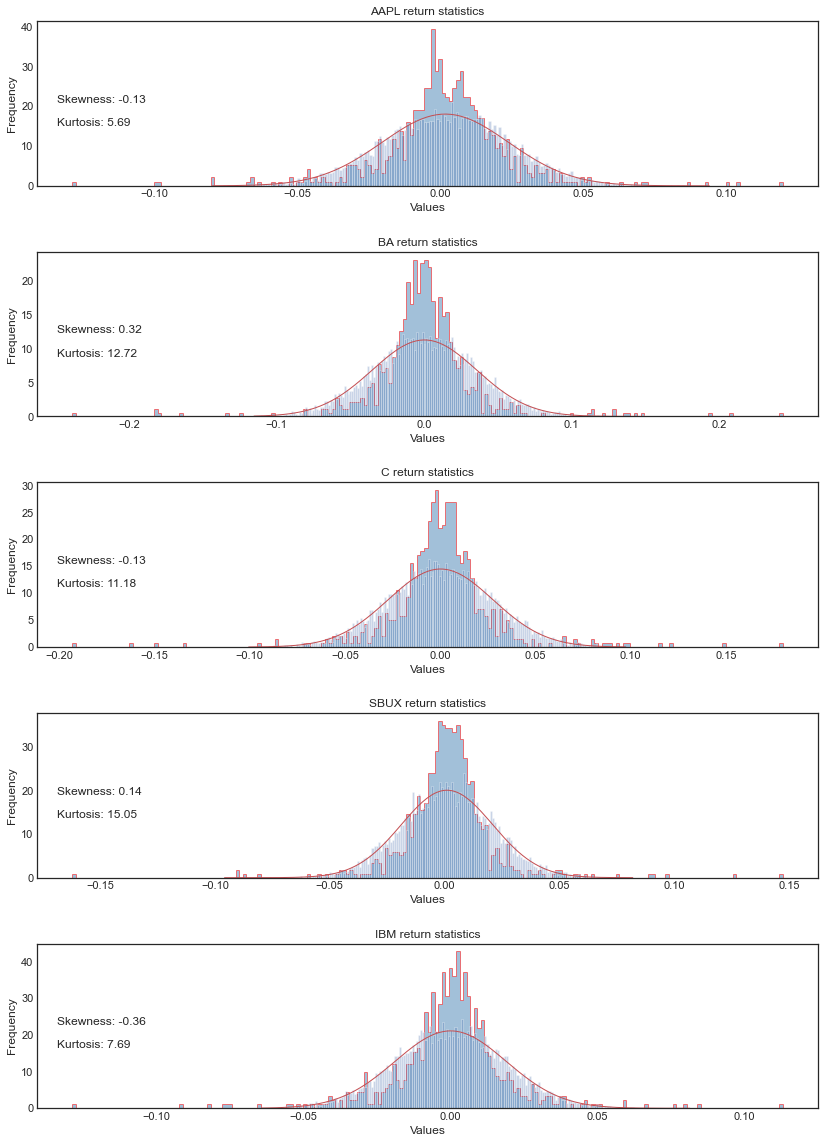

In [37]:
# helper function to draw each subplot
def _make_plot(ax, returns, tickname, bins_num):
    ax.hist(returns[tickname], bins=bins_num, color='steelblue', density=True,
       alpha=0.5, histtype='stepfilled', edgecolor='red')
    sigma, mu = returns[tickname].std(), returns[tickname].mean()
    s = np.random.normal(mu, sigma, 10000)
    values, bins, _ = ax.hist(s, bins_num, density=True, alpha=0.3)
    ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)), linewidth=1, color='r')
    ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                      round(returns[tickname].kurtosis(),2)),
                 xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title('{} return statistics'.format(tickname))
    
    return

# draw subplots of all stock returns
bins_number = 200
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(14,20))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# AAPL
tickname = 'AAPL'
plt.subplot(5,1,1)
ax = plt.gca()
_make_plot(ax, returns, tickname, bins_number)

# BA
tickname = 'BA'
plt.subplot(5,1,2)
ax = plt.gca()
_make_plot(ax, returns, tickname, bins_number)

# C
tickname = 'C'
plt.subplot(5,1,3)
ax = plt.gca()
_make_plot(ax, returns, tickname, bins_number)

# SBUX
tickname = 'SBUX'
plt.subplot(5,1,4)
ax = plt.gca()
_make_plot(ax, returns, tickname, bins_number)

# IBM
tickname = 'IBM'
plt.subplot(5,1,5)
ax = plt.gca()
_make_plot(ax, returns, tickname, bins_number)


### Sharp Ratio

Sharp ratio measures returns per unit risk taken, it is calculated by:<br>
$$\frac{R_p - R_f }{\sigma_p}$$

Where
+ $R_p$ is the return of the portfolio $p$.
+ $R_f$ is the risk-free rate, here assume it's 0.
+ $\sigma_p$ is the standard deviation of the portfolio $p$.

In [41]:
ONE_YEAR_DAYS = 225
sr = pd.DataFrame()
sr["Annualized Return(%)"] = np.round(returns.mean() * ONE_YEAR_DAYS * 100, 2)
sr["Annualized Volatility(%)"] = np.round(returns.std() * np.sqrt(ONE_YEAR_DAYS) * 100, 2)
sr["Sharp Ratio"] = np.round(sr["Annualized Return(%)"] / sr["Annualized Volatility(%)"], 2 )
sr

,Annualized Return(%),Annualized Volatility(%),Sharp Ratio
AAPL,40.21,33.17,1.21
BA,5.82,53.12,0.11
C,5.67,41.28,0.14
SBUX,24.74,29.84,0.83
IBM,2.22,28.35,0.08


### Covariance Matrix

In [42]:
cov_mat = returns.cov()
cov_mat

,AAPL,BA,C,SBUX,IBM
AAPL,0.000489,0.000344,0.000317,0.000237,0.000224
BA,0.000344,0.001254,0.000655,0.000393,0.000368
C,0.000317,0.000655,0.000757,0.000366,0.000340
SBUX,0.000237,0.000393,0.000366,0.000396,0.000217
IBM,0.000224,0.000368,0.000340,0.000217,0.000357


### Weight and Stock Combination

For 2 stocks with expected daily return $r_1$ and $r_2$, the expected daily combined return is: <br>
    $$E(r_c) = w_1r_1 + w_2r_2$$
where $w_1$ and $w_2$ are the weights, and $w_1 + w_2 = 1$.<br>
And the variance is calculated as:
    $$\sigma_{r_c}^2=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2$$
where $\sigma_1,\sigma_2$ are volatilities, and $\rho_{12}$ is their correlation.


In [49]:
# Take AAPL and SBUX for example
r_a = returns.mean()['AAPL']
r_s = returns.mean()['SBUX']
sig_a = returns.std()['AAPL']
sig_s = returns.std()['SBUX']
rho = returns['AAPL'].cov(returns['SBUX'])
rho

0.0002366868213563539

In [50]:
# functions to calculated expected return and variance
def get_two_stocks_return(w1, r1, r2):
    return w1*r1 + (1-w1)*r2

def get_two_stocks_std(w1, sig1, sig2, rho):
    return np.sqrt(w1**2*sig1**2 + (1-w1)**2*sig2**2 + 2*w1*(1-w1)*rho*sig1*sig2)

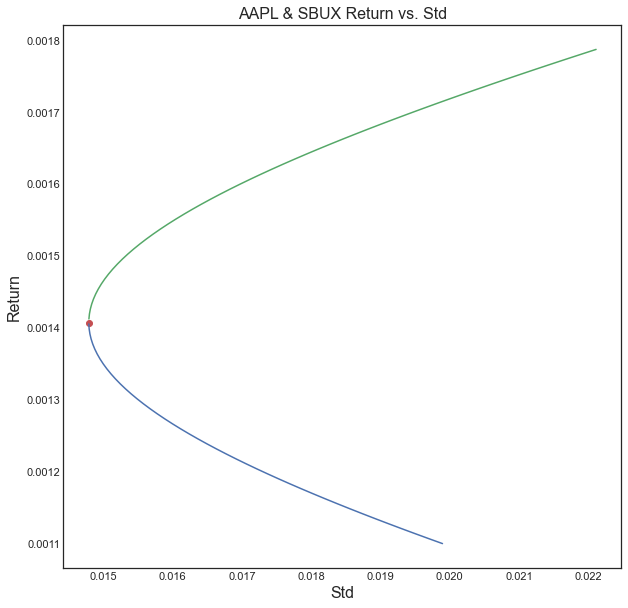

In [69]:
fig = plt.figure(figsize=(10,10))
weights = np.linspace(0,1,100)
w_min = (sig_s**2- sig_a*sig_s*rho)/(sig_a**2 + sig_s**2 - 2*sig_a*sig_s*rho) 
plt.plot(get_two_stocks_std(w_min, sig_a, sig_s, rho) , get_two_stocks_return(w_min, r_a, r_s), "ro")
plt.plot(get_two_stocks_std(weights[weights < w_min], sig_a, sig_s, rho) , get_two_stocks_return(weights[weights < w_min], r_a, r_s),  "b-")
plt.plot(get_two_stocks_std(weights[weights > w_min], sig_a, sig_s, rho) , get_two_stocks_return(weights[weights > w_min], r_a, r_s),  "g-")

plt.title("AAPL & SBUX Return vs. Std", fontsize = 16);
plt.ylabel("Return", fontsize = 16);
plt.xlabel("Std", fontsize = 16);

Green part of the curv is called: **"Efficient Frontier"**

### Monte Carlo Simulation 

We can use monte carlo simulation to simulate performance of multiple stocks

In [70]:
p_returns = []
p_volatilities = []
for p in range(50000):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    p_returns.append(np.sum(returns[[ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ]].mean()* weights))
    p_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns[[ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ]].cov(),weights))))

p_returns = np.array(p_returns)

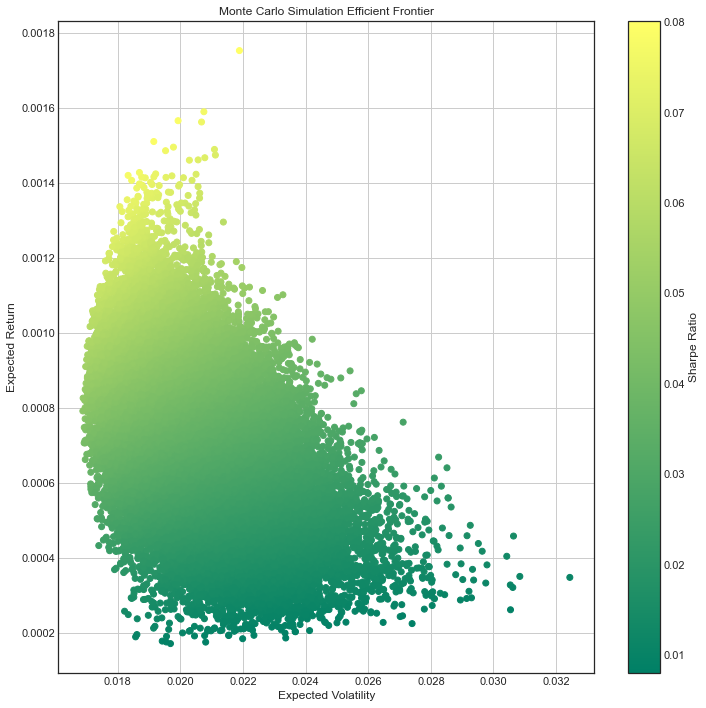

In [74]:
fig = plt.figure(figsize=(12,12))
plt.scatter(p_volatilities, p_returns, c=p_returns/p_volatilities, marker='o', cmap='summer')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier')

plt.show();